In [4]:
import sys
sys.path.insert(1,'../Utilities')
%matplotlib inline
# notebook
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np
import pandas as pd
import networkx as nx
import json
from math import sin, cos, sqrt, atan2, radians
from utils import *
from data import *
from businessUtilities import *
from refinedBusinesses import *
#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [2]:
def buildBusinessGraphByName(nameDict):
    G, labels = constructGraphByDictKey(nameDict)
    return G,labels
    
def plotGraph(G,labels,colors=None):
    pos=nx.spring_layout(G,k=1)
    nx.draw(G,pos,node_color=colors)
    for label in pos:
        x,y = pos[label]
        plt.text(x,y+0.035,s=labels[label],horizontalalignment='center',fontsize=24)


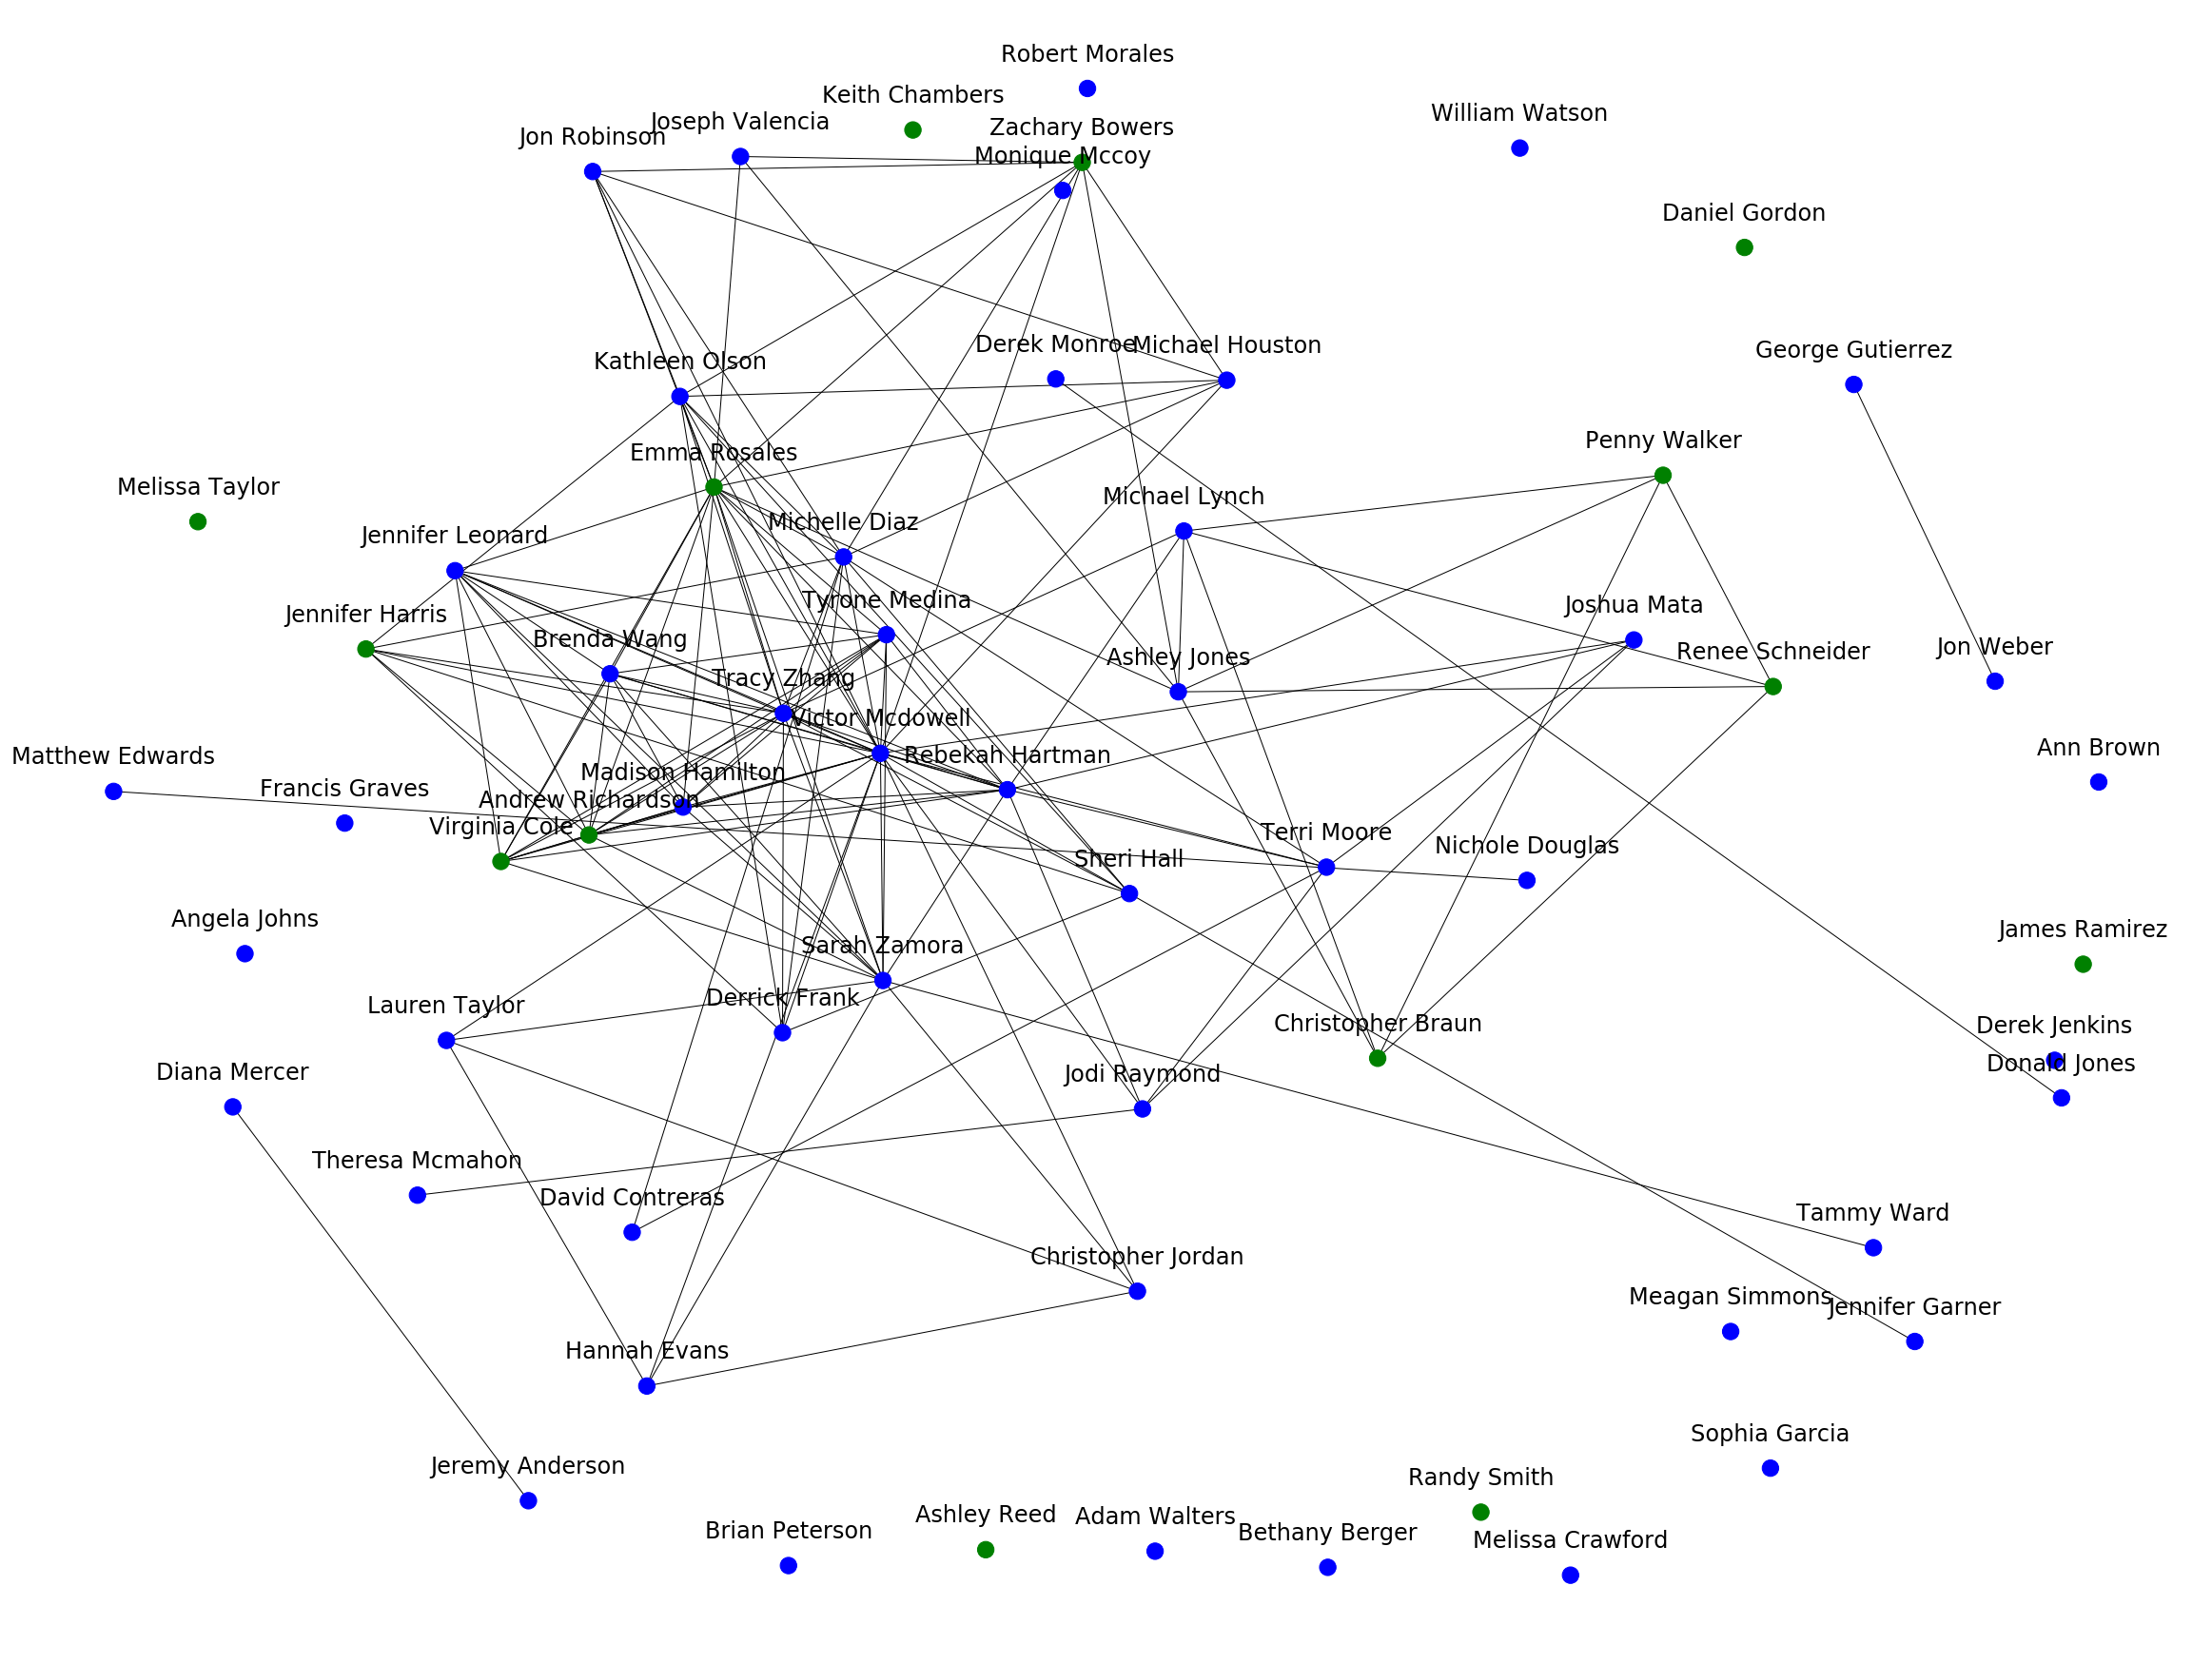

In [5]:
G,labels = buildBusinessGraphByName(coOwnerNetwork())
exportTagsByName = exportTags()
colors = ["blue" if exportTagsByName[x] == 0 else "green" for x in G]
plotGraph(G,labels,colors=colors)

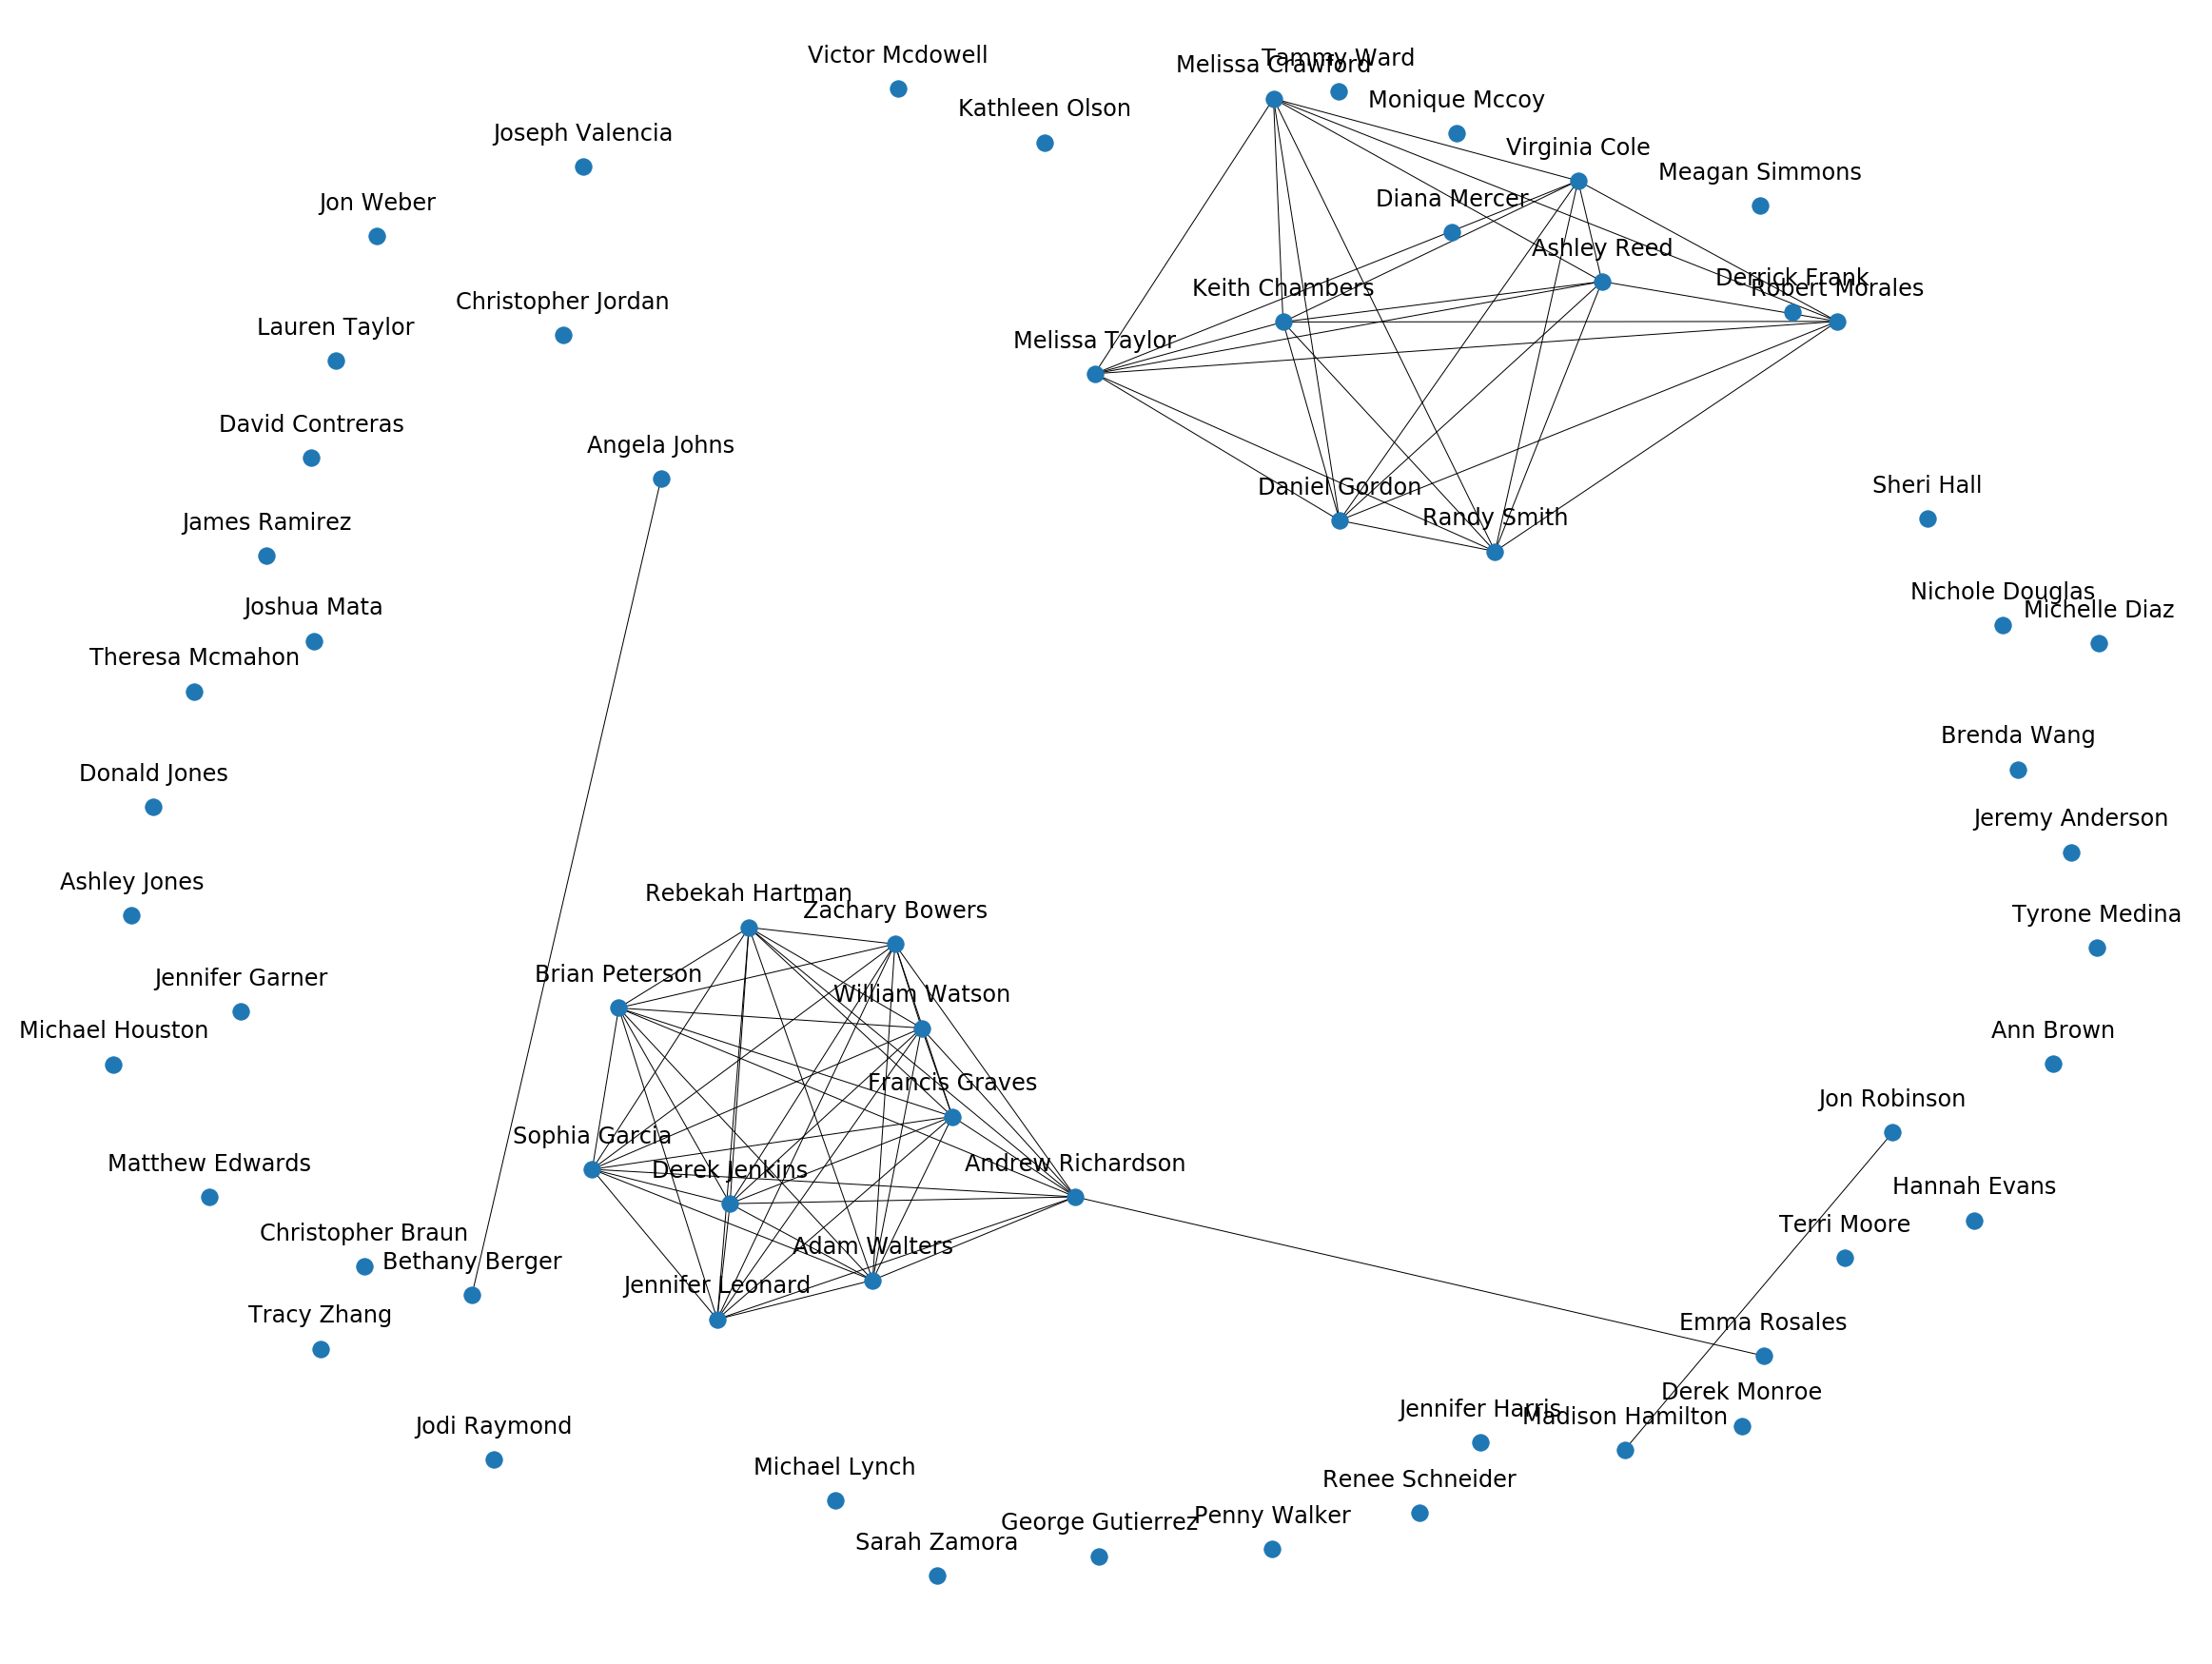

In [6]:
G,labels = buildBusinessGraphByName(exchangeNetwork())
plotGraph(G,labels)

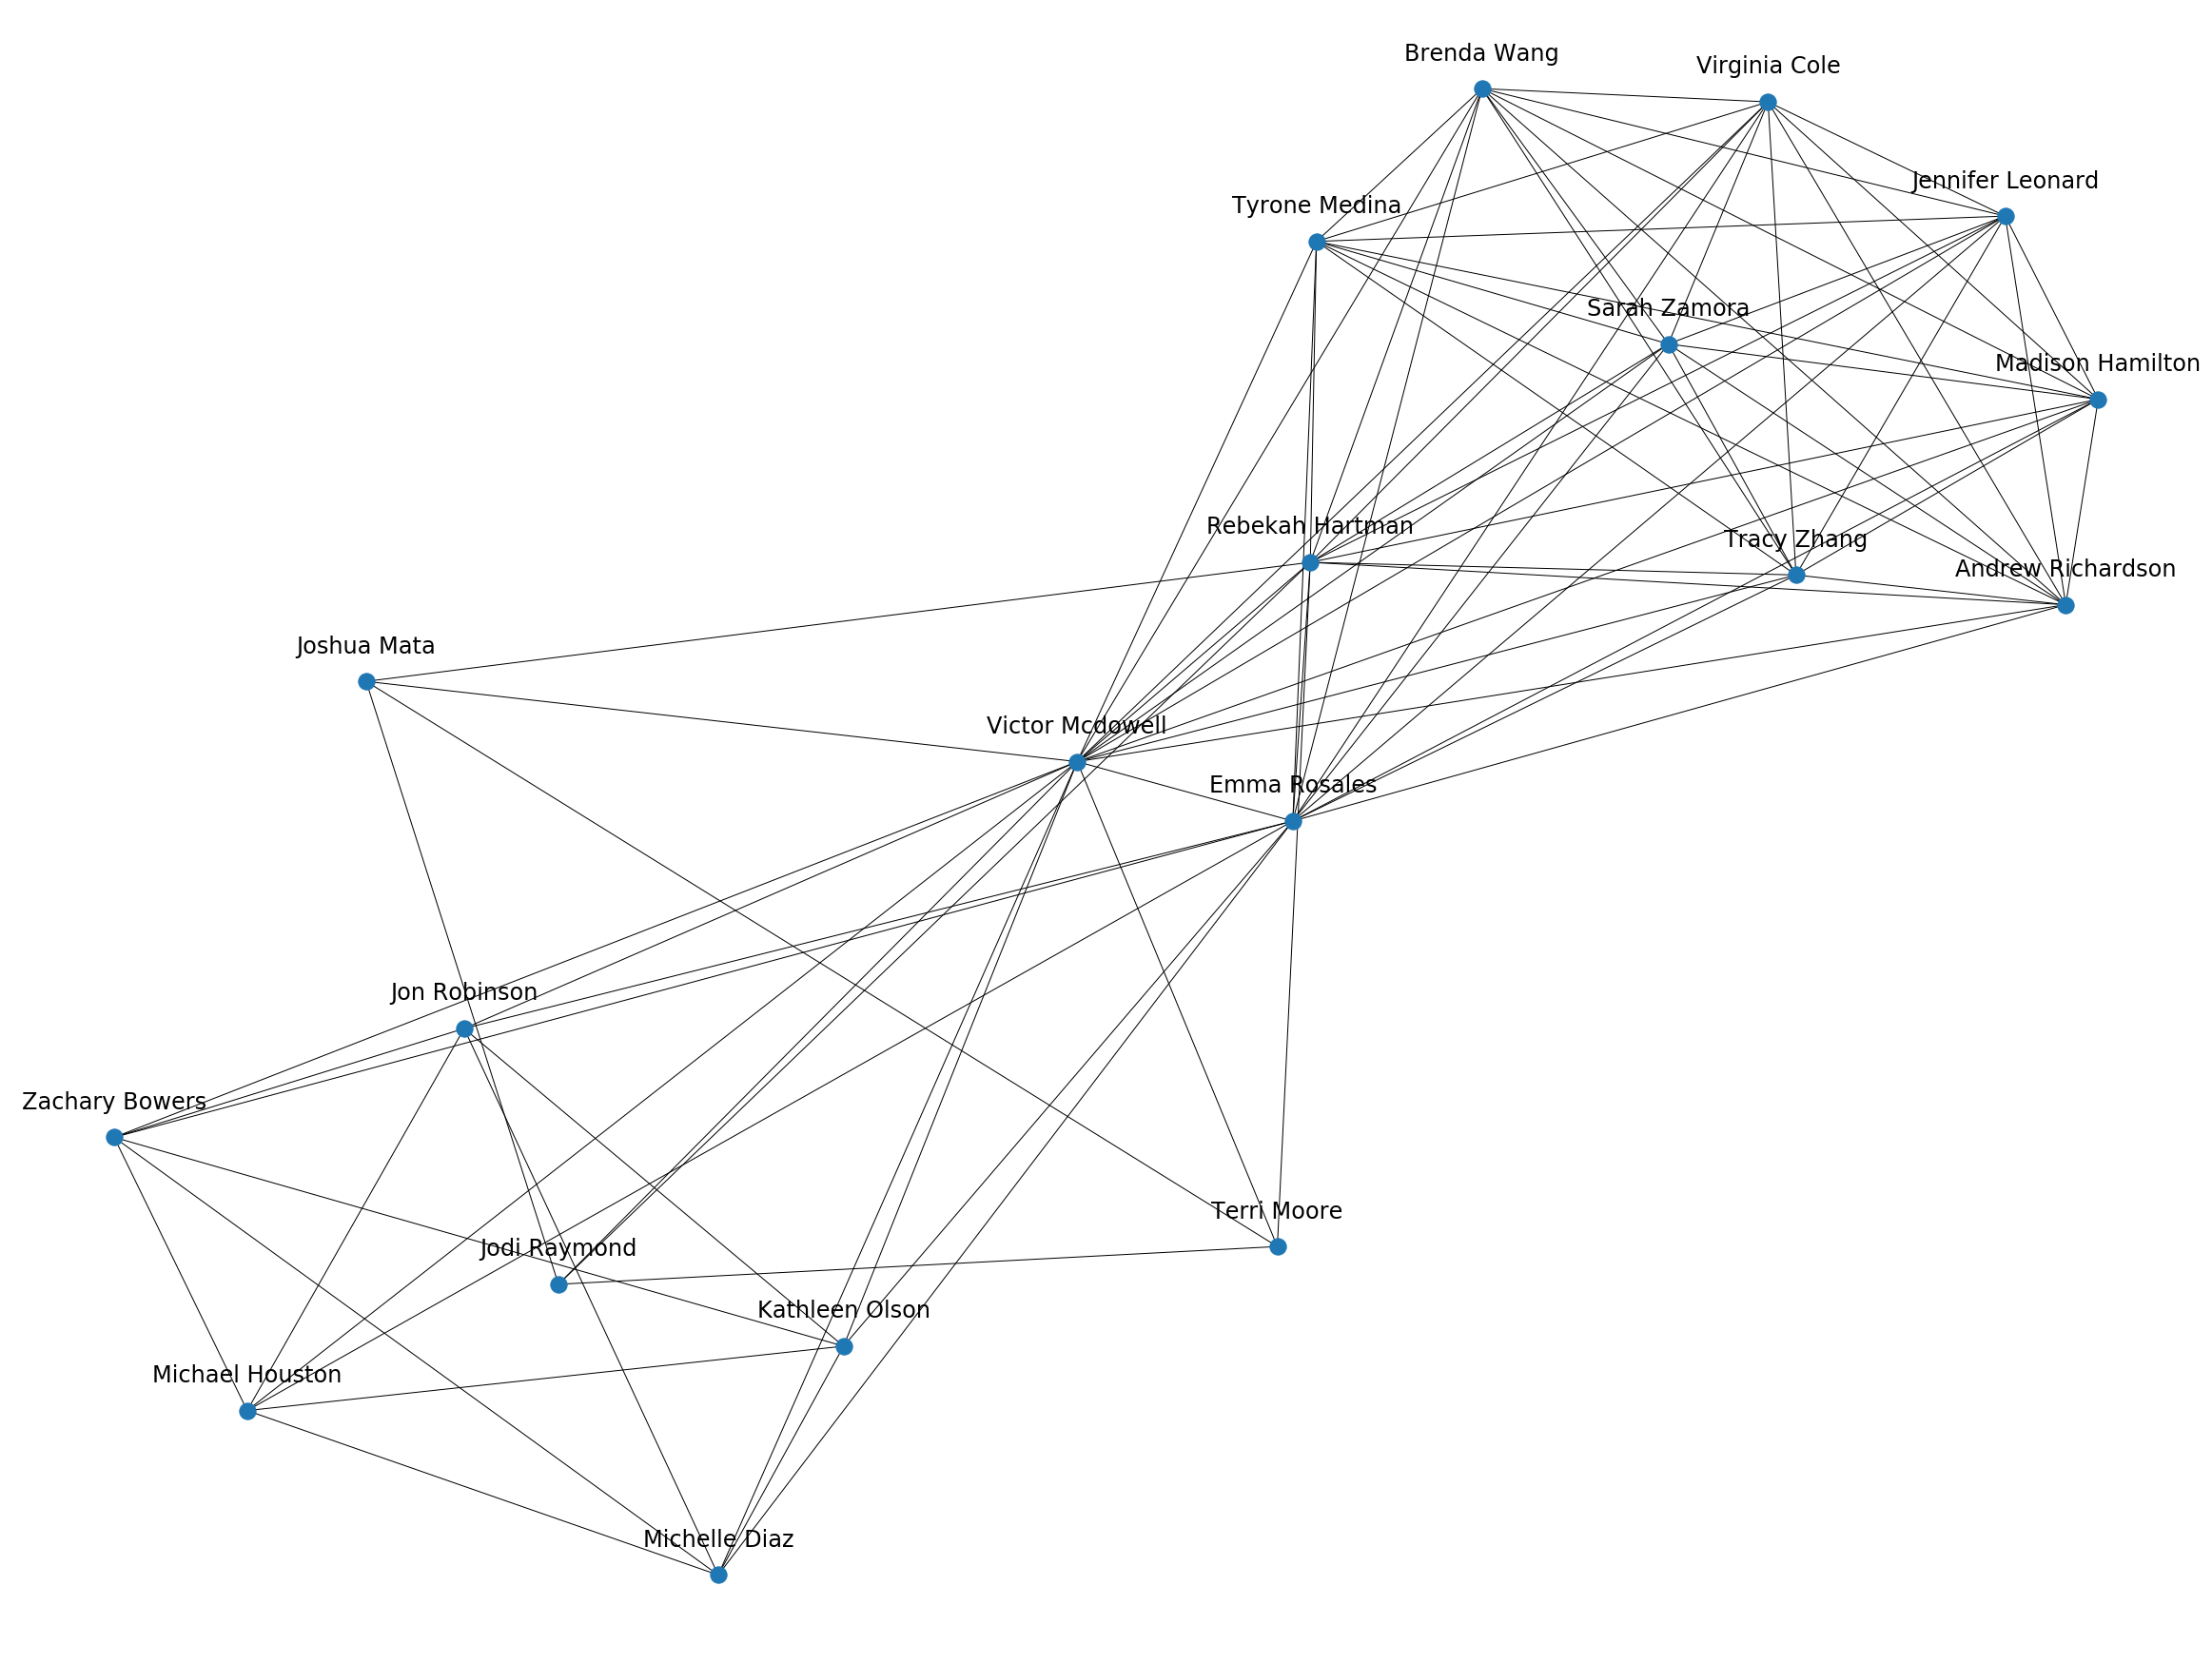

In [7]:
G,labels = buildBusinessGraphByName(politicalNetwork())
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
plotGraph(G,labels)
outputGraphToFile(G,'employees.txt')
labelsInOrder = list(G.nodes)
#attributesInOrder = list(map(lambda x: int(inPoliticalClass[x]),G.nodes))
np.savetxt('exportLabels.txt', labelsInOrder, '%s')
#np.savetxt('politicalAttributes.txt', attributesInOrder)

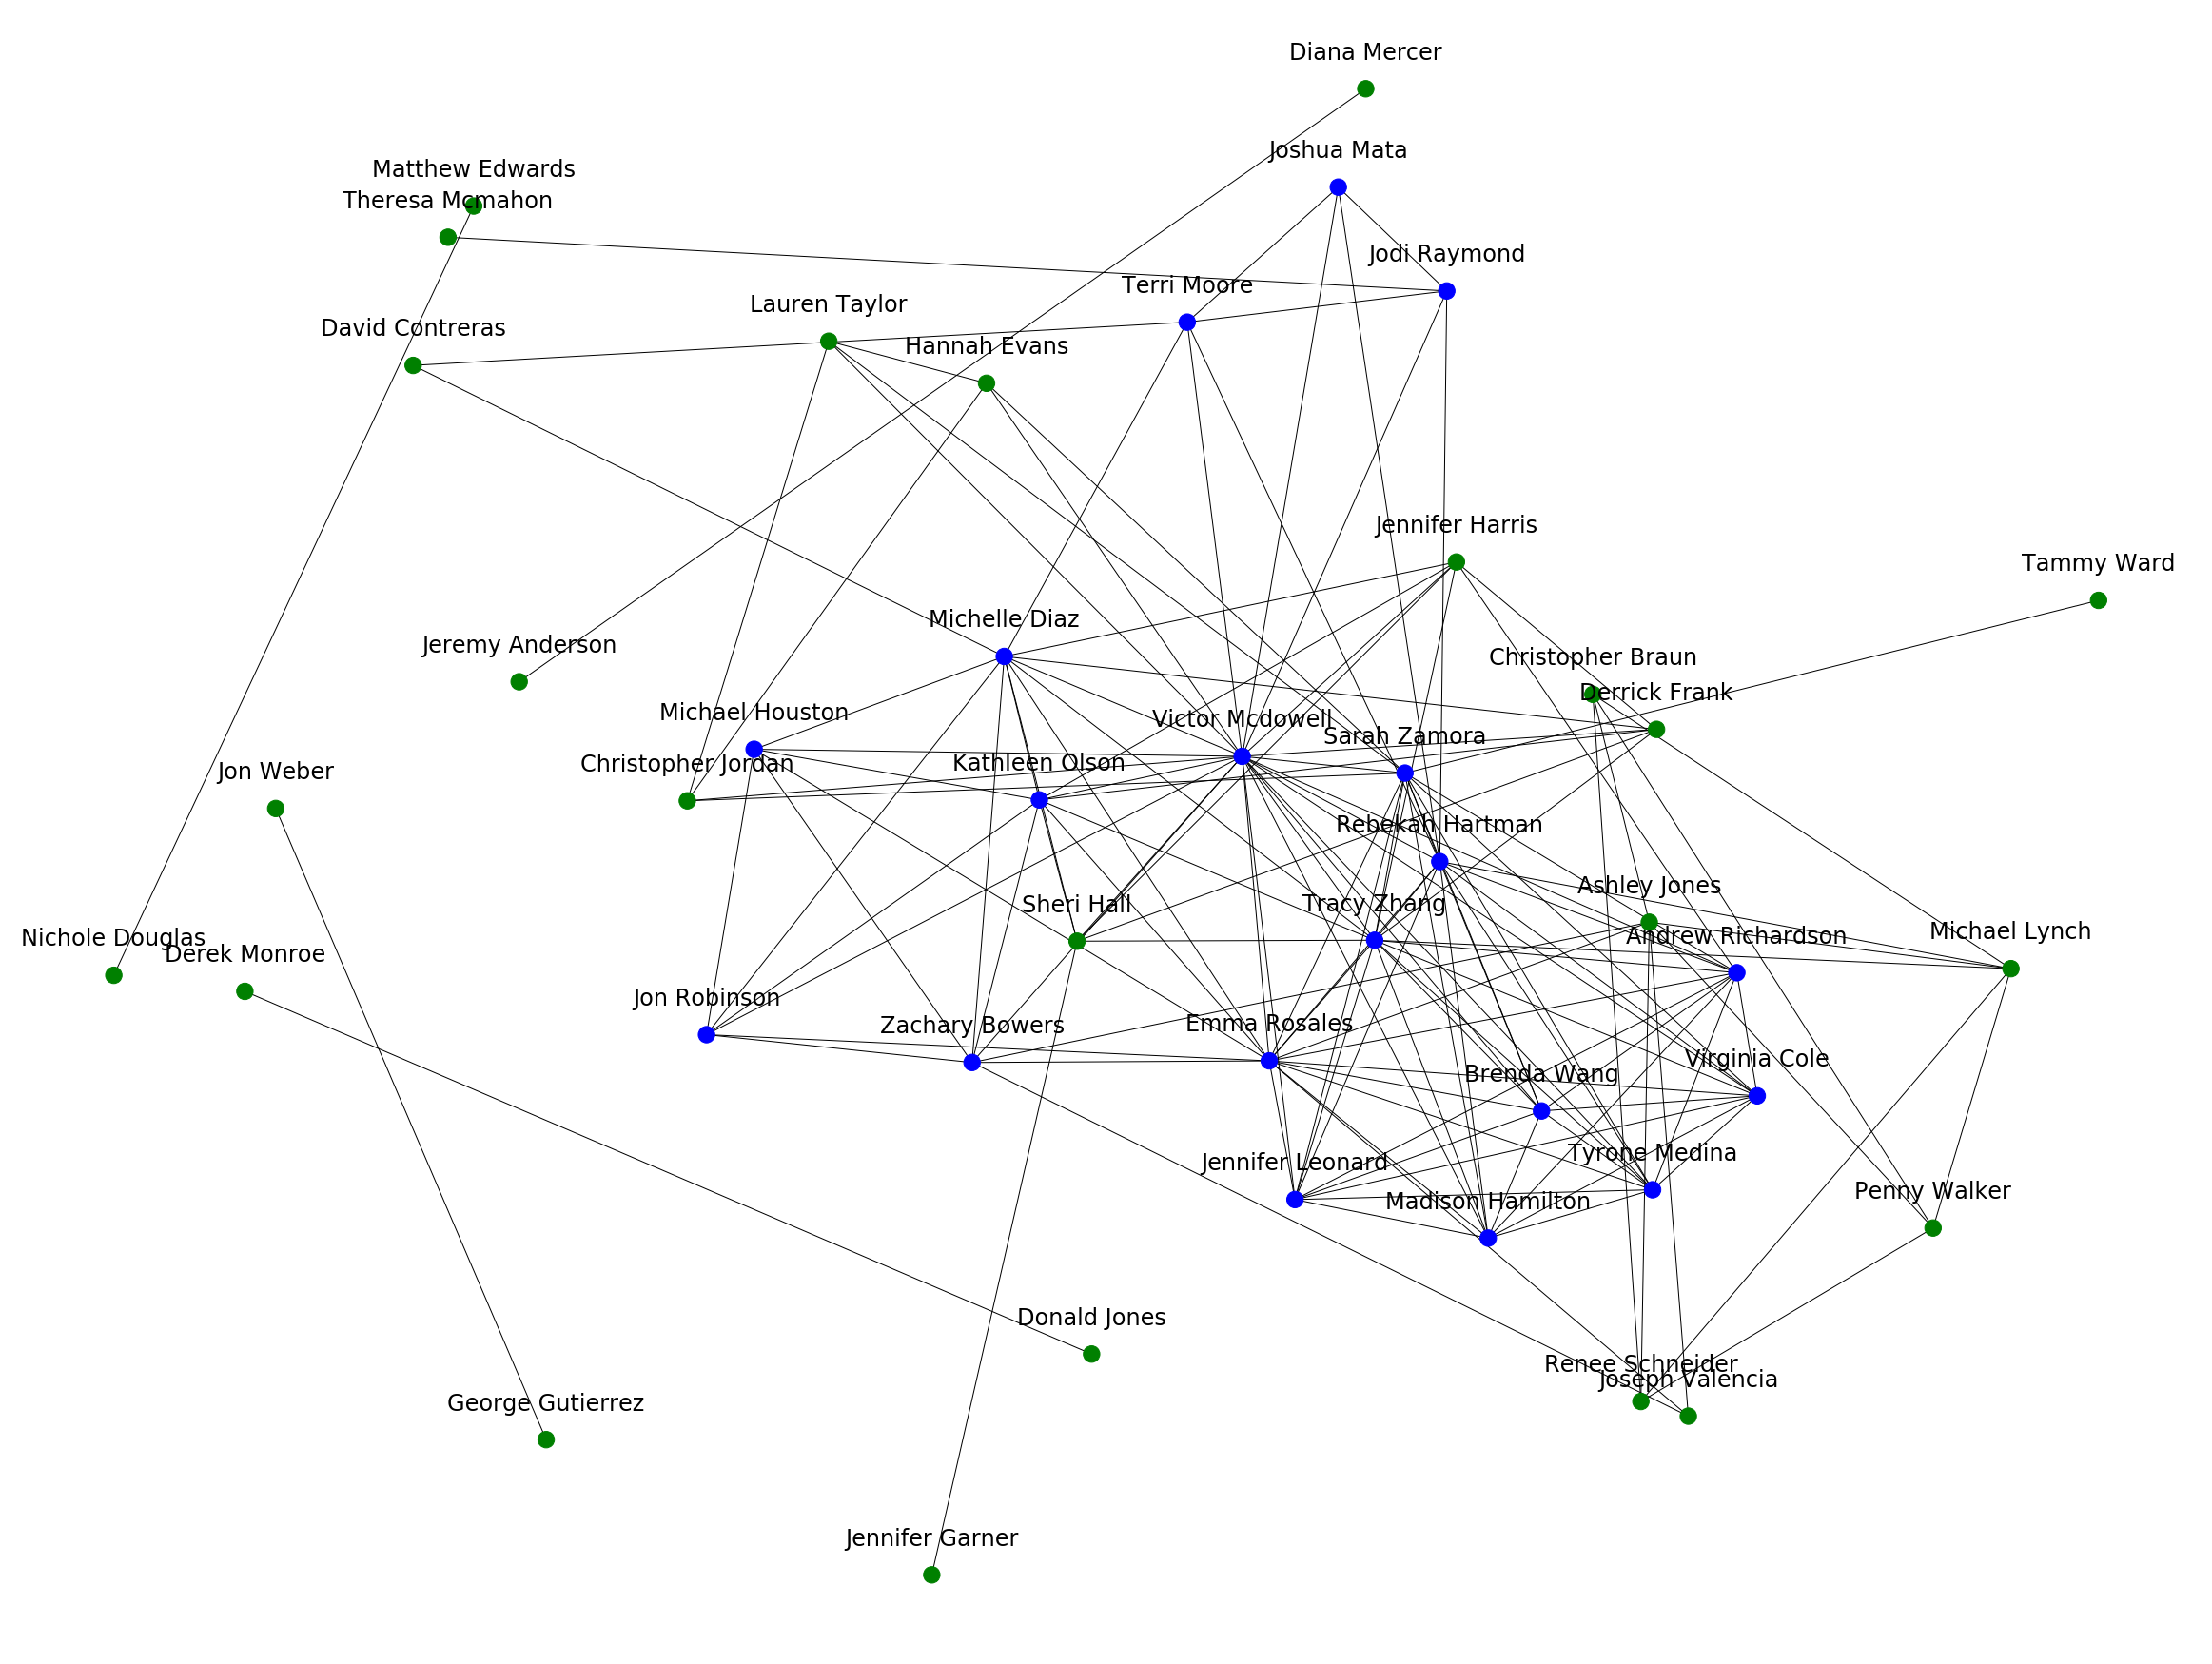

In [8]:
G,labels = buildBusinessGraphByName(coOwnerNetwork())
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
inPoliticalClass = involvedInPolitics()
colors = ["blue" if inPoliticalClass[x] == 1 else "green" for x in G]
plotGraph(G,labels,colors=colors)
outputGraphToFile(G,'political.txt')
labelsInOrder = list(G.nodes)
attributesInOrder = list(map(lambda x: int(inPoliticalClass[x]),G.nodes))
np.savetxt('politicalLabels.txt', labelsInOrder, '%s')
np.savetxt('politicalAttributes.txt', attributesInOrder)